In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns

In [ ]:
def read_sensor_data(file_prefix, num_sensors=15):
    sensor_dataframes = []
    for i in range(1, num_sensors + 1):
        filename = f'00_data/calibrated_data/indoor_cal/{file_prefix}{i:02d}.csv'
        sensor_df = pd.read_csv(filename)
        sensor_dataframes.append(sensor_df)
    return sensor_dataframes

sensor_dataframes = read_sensor_data('Indoor')

In [4]:
def calculate_unique_days(sensor_dataframes):
    days_count = {}
    for i, df in enumerate(sensor_dataframes, start=1):
        df['Timestamp_Local'] = pd.to_datetime(df['Timestamp_Local'])

        # Extract the date and count unique dates
        unique_days = df['Timestamp_Local'].dt.date.nunique()
        days_count[f"Sensor {i}"] = unique_days
    return days_count

# Calculate number of unique days for each sensor
days_count = calculate_unique_days(sensor_dataframes)

# Display the results
for sensor, count in days_count.items():
    print(f"{sensor} has {count} unique days.")


Sensor 1 has 55 unique days.
Sensor 2 has 142 unique days.
Sensor 3 has 125 unique days.
Sensor 4 has 100 unique days.
Sensor 5 has 120 unique days.
Sensor 6 has 109 unique days.
Sensor 7 has 129 unique days.
Sensor 8 has 118 unique days.
Sensor 9 has 122 unique days.
Sensor 10 has 83 unique days.
Sensor 11 has 96 unique days.
Sensor 12 has 128 unique days.
Sensor 13 has 86 unique days.
Sensor 14 has 82 unique days.
Sensor 15 has 113 unique days.


In [23]:
# Urban, Rural, and Semi-Urban sensors
urban_sensors = [7, 8, 9, 11, 14]
rural_sensors = [2, 4, 5, 6, 10]
semi_urban_sensors = [1, 3, 12, 13, 15]

## Zoomed 1000

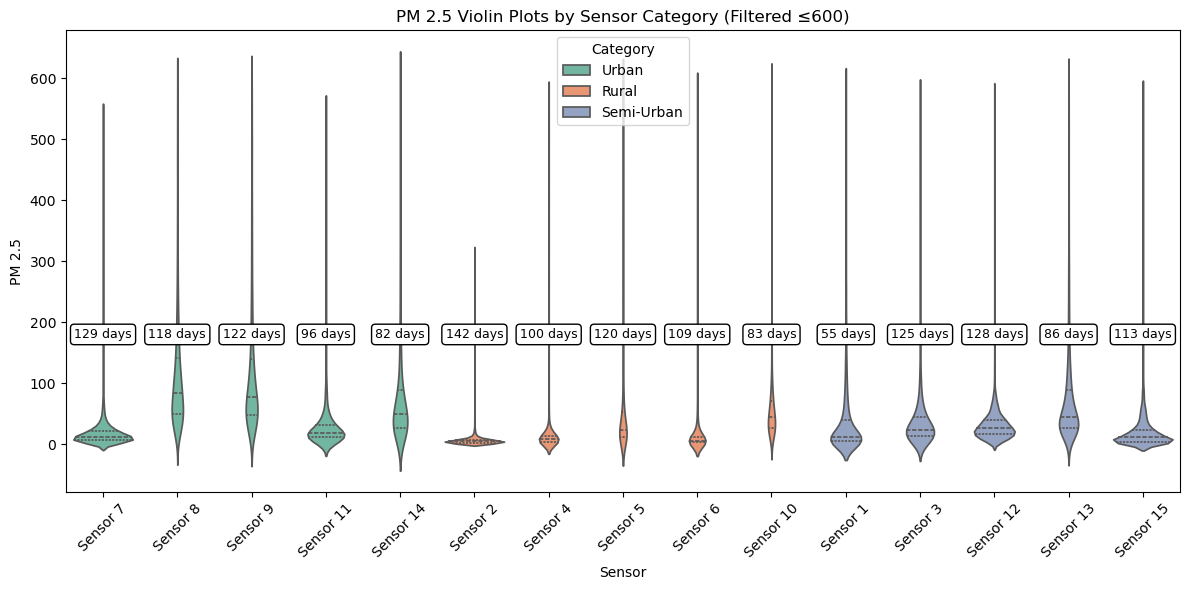

In [ ]:
def plot_pm25_violin(sensor_dataframes, days_count):
    # Define sensor categories
    urban_sensors = [7, 8, 9, 11, 14]
    rural_sensors = [2, 4, 5, 6, 10]
    semi_urban_sensors = [1, 3, 12, 13, 15]

    # Create a list for all sensor data, grouped by category
    all_data = []
    for i, df in enumerate(sensor_dataframes, start=1):
        # Extract the sensor category
        if i in urban_sensors:
            category = 'Urban'
        elif i in rural_sensors:
            category = 'Rural'
        else:
            category = 'Semi-Urban'
        
        # Create a new column with sensor category for plotting
        df['Category'] = category
        df['Sensor'] = f"Sensor {i}"
        
        # Remove values greater than 600 in the 'PM2.5' column
        df['PM2.5'] = pd.to_numeric(df['PM2.5'], errors='coerce')
        df_filtered = df[df['PM2.5'] <= 600]
        
        # Add filtered data to the list
        if 'PM2.5' in df_filtered.columns:
            all_data.append(df_filtered[['Sensor', 'PM2.5', 'Category']])

    # Concatenate all the filtered data frames
    all_data_df = pd.concat(all_data, ignore_index=True)

    # Explicit sensor order: Urban, then Rural, then Semi-Urban
    sensor_order = urban_sensors + rural_sensors + semi_urban_sensors
    sensor_order_labels = [f"Sensor {s}" for s in sensor_order]
    
    # Create the violin plot
    plt.figure(figsize=(12, 6))
    ax = sns.violinplot(
        data=all_data_df, 
        x='Sensor', 
        y='PM2.5', 
        hue='Category', 
        inner="quart", 
        palette="Set2", 
        hue_order=['Urban', 'Rural', 'Semi-Urban'],
        order=sensor_order_labels
    )
    
    # Annotate the unique days inside each violin plot
    for i, sensor in enumerate(sensor_order_labels):
        unique_days = days_count.get(sensor, 'N/A')
        ax.text(
            i,
            180,  # place annotation near the top of y-axis range
            f'{unique_days} days',
            ha='center',
            va='center',
            fontsize=9,
            color='black',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
        )
    
    # Labels and title
    ax.set_title('PM 2.5 Violin Plots by Sensor Category (Filtered ≤600)')
    ax.set_xlabel('Sensor')
    ax.set_ylabel('PM 2.5')
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_pm25_violin(sensor_dataframes, days_count)

## Zoomed 200

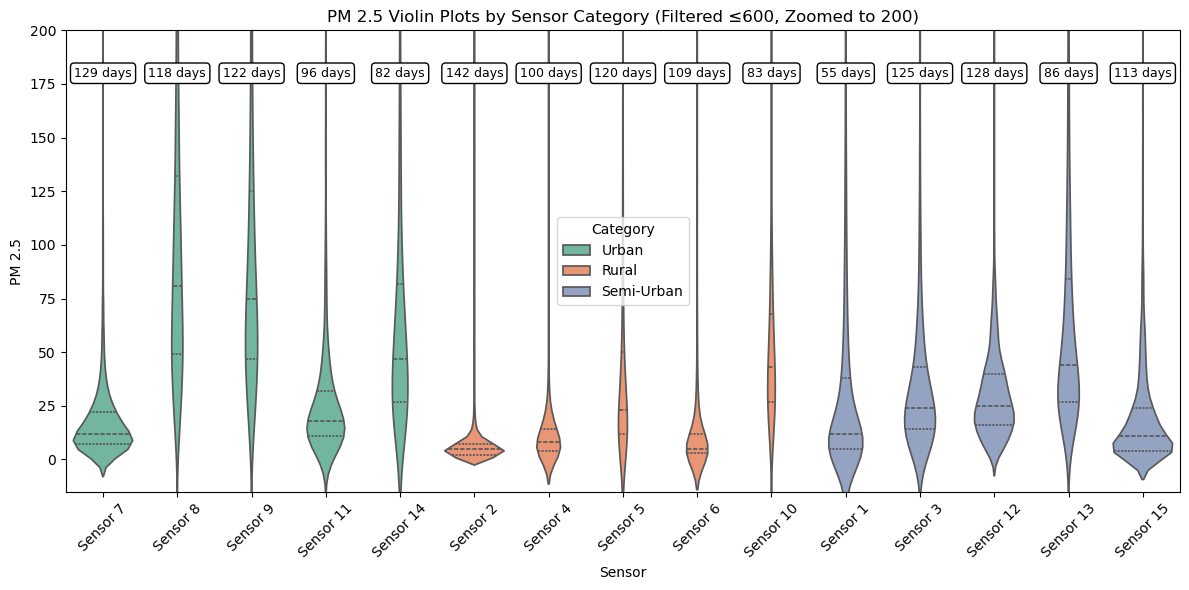

In [27]:
def plot_pm25_violin(sensor_dataframes, days_count):
    # Define sensor categories
    urban_sensors = [7, 8, 9, 11, 14]
    rural_sensors = [2, 4, 5, 6, 10]
    semi_urban_sensors = [1, 3, 12, 13, 15]

    # Create a list for all sensor data, grouped by category
    all_data = []
    for i, df in enumerate(sensor_dataframes, start=1):
        # Extract the sensor category
        if i in urban_sensors:
            category = 'Urban'
        elif i in rural_sensors:
            category = 'Rural'
        else:
            category = 'Semi-Urban'
        
        # Create a new column with sensor category for plotting
        df['Category'] = category
        df['Sensor'] = f"Sensor {i}"
        
        # Remove values greater than 600 in the 'PM2.5' column
        
        df_filtered = df[(df['PM2.5'] >= 0) & (df['PM2.5'] <= 400)]
        
        # Add filtered data to the list
        if 'PM2.5' in df_filtered.columns:
            all_data.append(df_filtered[['Sensor', 'PM2.5', 'Category']])

    # Concatenate all the filtered data frames
    all_data_df = pd.concat(all_data, ignore_index=True)

    # Explicit sensor order: Urban, then Rural, then Semi-Urban
    sensor_order = urban_sensors + rural_sensors + semi_urban_sensors
    sensor_order_labels = [f"Sensor {s}" for s in sensor_order]
    
    # Create the violin plot
    plt.figure(figsize=(12, 6))
    ax = sns.violinplot(
        data=all_data_df, 
        x='Sensor', 
        y='PM2.5', 
        hue='Category', 
        inner="quart", 
        palette="Set2", 
        hue_order=['Urban', 'Rural', 'Semi-Urban'],
        order=sensor_order_labels
    )
    
    # Limit y-axis to 200
    plt.ylim(-15, 200)

    # Annotate the unique days inside each violin plot
    for i, sensor in enumerate(sensor_order_labels):
        unique_days = days_count.get(sensor, 'N/A')
        ax.text(
            i,
            180,  # place annotation near the top of y-axis range
            f'{unique_days} days',
            ha='center',
            va='center',
            fontsize=9,
            color='black',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
        )
    
    # Labels and title
    ax.set_title('PM 2.5 Violin Plots by Sensor Category (Filtered ≤600, Zoomed to 200)')
    ax.set_xlabel('Sensor')
    ax.set_ylabel('PM 2.5')
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_pm25_violin(sensor_dataframes, days_count)